Так, сегодня мы реализуем KMeans

In [116]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [117]:
class KMeans():
    def __init__(self, n_clast: int):
        self.n_clast = n_clast
        self.sc = StandardScaler()
        self.cluster_centers__ = []
        self.cluster_centers_ = []
        self.__d = None
        
    def fit(self, data, n_steps=10):
        
        # if it was not fitted early
        if len(self.cluster_centers_) == 0:   
            nx, ny = data.shape
            self.cluster_centers__ = np.random.uniform(low=0.0, high=1.0, size=ny * self.n_clast).reshape((self.n_clast, ny))
        # transform data for adequate metric
        self.sc.fit(data)
        _d = self.sc.transform(data)
        
        # define "answers"
        _y = np.zeros(nx)
        # let's iteratively move claster centers
        for step in range(n_steps):
            _y = self._predict_loc(_d)
            for i in range(len(self.cluster_centers__)):
                self.cluster_centers__[i] = _d[_y == i].mean(axis=0)
        # this is for public
        self.cluster_centers_ = self.sc.inverse_transform(self.cluster_centers__)
    
    def predict_one(self, x):
        min_dist = np.inf
        min_ind = 0
        _d = 0
        for i in range(len(self.cluster_centers__)):
            _d = np.linalg.norm(self.cluster_centers__[i] - x)
            if _d < min_dist:
                min_dist = _d
                min_ind = i
        return min_ind
            
    def _predict_loc(self, data):
        return np.apply_along_axis(self.predict_one, 1, data)
    
    def predict(self, data):
        return np.apply_along_axis(self.predict_one, 1, self.sc.transform(data))

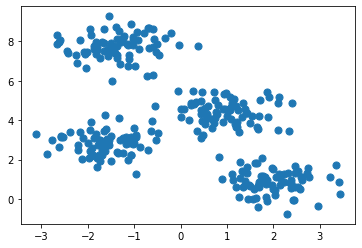

In [118]:

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [119]:
clf = KMeans(n_clast=4)

In [120]:
clf.fit(X)

In [121]:
y_kmeans = clf.predict(X)

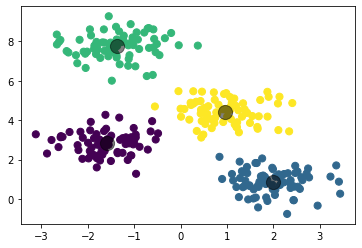

In [122]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = clf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);